# Combining DataFrames with Pandas

## Teaching

In [1]:
import pandas as pd
import random
surveys_df = pd.read_csv("data/surveys.csv", keep_default_na=False, na_values=[""])
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [2]:
species_df = pd.read_csv("data/species.csv", keep_default_na=False, na_values=[""])
species_df

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird
5,CM,Calamospiza,melanocorys,Bird
6,CQ,Callipepla,squamata,Bird
7,CS,Crotalus,scutalatus,Reptile
8,CT,Cnemidophorus,tigris,Reptile
9,CU,Cnemidophorus,uniparens,Reptile


In [3]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)
# Grab the last 10 rows
survey_sub_last10 = surveys_df.tail(10)
# Reset the index values to the second dataframe appends properly
survey_sub_last10 = survey_sub_last10.reset_index(drop=True)
# drop=True option avoids adding new index column with old index values

In [4]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)

In [5]:
# Write DataFrame to CSV
vertical_stack.to_csv('data_output/out.csv', index=False)

In [6]:
# For kicks read our output back into Python and make sure all looks good
new_output = pd.read_csv('data_output/out.csv', keep_default_na=False, na_values=[""])
new_output

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


### Challenge - Combine Data

In [7]:
# import, combine, and export data
survey_2001 = pd.read_csv("data/surveys2001.csv", keep_default_na=False, na_values=[""])
survey_2002 = pd.read_csv("data/surveys2002.csv", keep_default_na=False, na_values=[""])
joint_df = pd.concat([survey_2001, survey_2002], axis=0)
joint_df.to_csv('data_output/joint_survey.csv', index=False)
joint_df

,Unnamed: 0,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,31710,31711,1,21,2001,1,PB,F,26.0,25.0
1,31711,31712,1,21,2001,1,DM,M,37.0,43.0
2,31712,31713,1,21,2001,1,PB,M,29.0,44.0
3,31713,31714,1,21,2001,1,DO,M,34.0,53.0
4,31714,31715,1,21,2001,2,OT,M,20.0,27.0
...,...,...,...,...,...,...,...,...,...,...
2073,35540,35541,12,31,2002,15,PB,F,24.0,31.0
2074,35541,35542,12,31,2002,15,PB,F,26.0,29.0
2075,35542,35543,12,31,2002,15,PB,F,27.0,34.0
2076,35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [8]:
# checking file
check_df = pd.read_csv('data_output/joint_survey.csv', keep_default_na=False, na_values=[""])
check_df

,Unnamed: 0,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,31710,31711,1,21,2001,1,PB,F,26.0,25.0
1,31711,31712,1,21,2001,1,DM,M,37.0,43.0
2,31712,31713,1,21,2001,1,PB,M,29.0,44.0
3,31713,31714,1,21,2001,1,DO,M,34.0,53.0
4,31714,31715,1,21,2001,2,OT,M,20.0,27.0
...,...,...,...,...,...,...,...,...,...,...
3507,35540,35541,12,31,2002,15,PB,F,24.0,31.0
3508,35541,35542,12,31,2002,15,PB,F,26.0,29.0
3509,35542,35543,12,31,2002,15,PB,F,27.0,34.0
3510,35546,35547,12,31,2002,10,RM,F,15.0,14.0


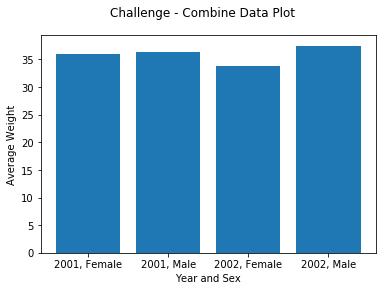

In [9]:
# get data averages
num_List = joint_df.groupby(["year", "sex"])["weight"].count()
sum_List = joint_df.groupby(["year", "sex"])["weight"].sum()
avg_List = sum_List/num_List

# plot data
import matplotlib.pyplot as plt

x_vals = [1, 2, 3, 4]
x_labels = ['2001, Female', '2001, Male', '2002, Female', '2002, Male']

fig, ax = plt.subplots()
ax.bar(x_vals, avg_List)
ax.set_xticks(x_vals)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Year and Sex')
ax.set_ylabel('Average Weight')
fig.suptitle('Challenge - Combine Data Plot')
plt.show()

### Teaching

In [10]:
# Read in first 10 lines of surveys table
survey_sub = surveys_df.head(10)

# Import a small subset of the species data designed for this part of the lesson.
# It is stored in the data folder.
species_sub = pd.read_csv('data/speciesSubset.csv', keep_default_na=False, na_values=[""])

In [11]:
species_sub.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [12]:
survey_sub.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [13]:
merged_inner = pd.merge(left=survey_sub, right=species_sub, left_on='species_id', right_on='species_id')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_inner.shape


(8, 12)

In [14]:
merged_inner

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
6,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
7,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent


In [15]:
merged_left = pd.merge(left=survey_sub, right=species_sub, how='left', left_on='species_id', right_on='species_id')
merged_left

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


In [16]:
merged_left[ pd.isnull(merged_left.genus) ]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
5,6,7,16,1977,1,PF,M,14.0,NaN,NaN,NaN,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN,NaN,NaN,NaN


### Challenge - Distributions

In [17]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [18]:
species_df.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [19]:
main_inner = pd.merge(left=surveys_df, right=species_df, left_on='species_id', right_on='species_id')
main_inner

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,22,7,17,1977,15,NL,F,31.0,NaN,Neotoma,albigula,Rodent
3,38,7,17,1977,17,NL,M,33.0,NaN,Neotoma,albigula,Rodent
4,72,8,19,1977,2,NL,M,31.0,NaN,Neotoma,albigula,Rodent
...,...,...,...,...,...,...,...,...,...,...,...,...
34781,28988,12,23,1998,6,CT,NaN,NaN,NaN,Cnemidophorus,tigris,Reptile
34782,35512,12,31,2002,11,US,NaN,NaN,NaN,Sparrow,sp.,Bird
34783,35513,12,31,2002,11,US,NaN,NaN,NaN,Sparrow,sp.,Bird
34784,35528,12,31,2002,13,US,NaN,NaN,NaN,Sparrow,sp.,Bird


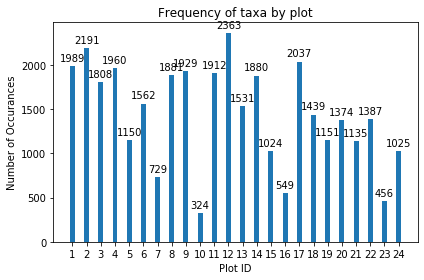

In [20]:
import numpy as np
# organizing the data
plot1_data = main_inner.groupby("plot_id")['taxa'].count()
plot2_data = main_inner.groupby(["plot_id",'sex'])['taxa'].count()

# plot of taxa by plot id
labels = plot1_data.index
plot_data = plot1_data

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, plot_data, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Plot ID')
ax.set_ylabel('Number of Occurances')
ax.set_title('Frequency of taxa by plot')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

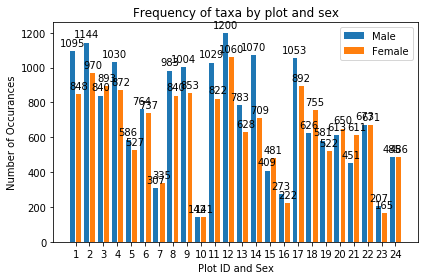

In [21]:
labels = plot1_data.index
male_data = plot2_data[1::2]
female_data = plot2_data[0::2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.05, male_data, width, label='Male')
rects2 = ax.bar(x + width/2 + 0.05, female_data, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Plot ID and Sex')
ax.set_ylabel('Number of Occurances')
ax.set_title('Frequency of taxa by plot and sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Challenge - Diversity Index

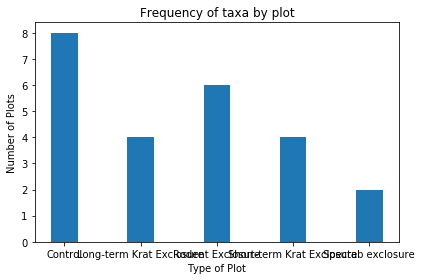

In [22]:
plot_df = pd.read_csv("data/plots.csv", keep_default_na=False, na_values=[""])
plot3_data = plot_df.groupby("plot_type")['plot_type'].count()
x_ticks = plot3_data.index
x_label = 'Type of Plot'
y_label = 'Number of Plots'

x = np.arange(len(x_ticks))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, plot3_data, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title('Frequency of taxa by plot')
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)

fig.tight_layout()

plt.show()

In [23]:
# find randomize amount
def rand_amt(data, id_col, id_label, rand_col):
    df = data.copy()
    df_copy_max = df.fillna(-1)
    max_val_List = df_copy_max.groupby(id_col)[rand_col].max()
    max_val = max_val_List[id_label]
    df_copy_min = df.fillna(1000)
    min_val_List = df_copy_min.groupby(id_col)[rand_col].min()
    min_val = min_val_List[id_label]
    if (max_val == -1) and (min_val == 1000):
        return 'invalid'
    amt_rand = (max_val - min_val)/10
    return amt_rand

In [24]:
# randomize value in specific column
def rand_hindfoot(data, id_col, id_label, rand_col, rand_value):
    df = data.copy()
    if rand_value == np.nan:
        return df
    for i in range(len(df)):
        if df[id_col][i] == id_label:
            df.loc[i, rand_col] = df.loc[i, rand_col] + random.uniform(-rand_value, rand_value)
    
    return df

In [25]:
# complete function
import numpy as np
def rand_hindfoot_full(data, col_id, col_rand):
    data_copy = data.copy()
    id_List = list(data[col_id].unique())
    id_List.remove(np.nan)
    for item in id_List:
        val_rand = rand_amt(data_copy, col_id, item, col_rand)
        if val_rand != 'invalid':
            data_copy = rand_hindfoot(data_copy, col_id, item, col_rand, val_rand)
    
    return data_copy
randomized_data = rand_hindfoot_full(surveys_df, 'species_id', 'hindfoot_length')
randomized_data.to_csv('data_output/randomized_data_survey.csv', index=False)
randomized_data

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,34.937203,NaN
1,2,7,16,1977,3,NL,M,28.627454,NaN
2,3,7,16,1977,2,DM,F,38.766307,NaN
3,4,7,16,1977,7,DM,M,37.162495,NaN
4,5,7,16,1977,3,DM,M,34.552630,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,16.261999,14.0
35547,35548,12,31,2002,7,DO,M,33.185768,51.0


In [37]:
# works best with numbers, datasets should be same size

def compare_col_abs_value(data1, col1, data2, col2):
    sum_value = 0
    data1_copy = data1.copy()
    data1_copy = data1_copy.fillna('invalid')
    
    data2_copy = data2.copy()
    data2_copy = data2_copy.fillna('invalid')

    for i in range(len(data1)):
        if (data1_copy[col1][i] != 'invalid') and (data2_copy[col2][i] != 'invalid'):
            add_value = abs(data1_copy[col1][i] - data2_copy[col2][i])
        else:
            add_value = 0
            
        sum_value = sum_value + add_value
    
    return sum_value

compare_col_abs_value(surveys_df, 'hindfoot_length', randomized_data, 'hindfoot_length')

49879.38690587153

In [27]:
def compare_col_diff_squared(data1, col1, data2, col2):
    sum_value = 0
    data1_copy = data1.copy()
    data1_copy = data1_copy.fillna('invalid')
    
    data2_copy = data2.copy()
    data2_copy = data2_copy.fillna('invalid')

    for i in range(len(data1)):
        if (data1_copy[col1][i] != 'invalid') and (data2_copy[col2][i] != 'invalid'):
            add_value = (data1_copy[col1][i] - data2_copy[col2][i])**2
        else:
            add_value = 0
            
        sum_value = sum_value + add_value
    
    return sum_value

compare_col_diff_squared(surveys_df, 'hindfoot_length', randomized_data, 'hindfoot_length')

113936.29436300999

In [36]:
def id_specific_diff(dataset1, col1, dataset2, col2):
    id_List = list(dataset1['species_id'].unique())
    use_col1 = col1
    use_col2 = col2
    
    for item in id_List:
        sub_data1 = (dataset1['species_id'] == item)
        use_data1 = dataset1[sub_data1]
        
        sub_data2 = (dataset2['species_id'] == item)
        use_data2 = dataset2[sub_data2]
        
        sum_Diff = compare_col_abs_value(use_data1, use_col1, use_data2, use_col2)
        
        print('The total difference in the two surveys for the species with the id of ', item, ' is', sum_Diff)
        
id_specific_diff(surveys_df, 'hindfoot_length', randomized_data, 'hindfoot_length')

KeyError: 2

In [45]:
sub_data1 = (surveys_df['species_id'] == 'NL')
use_data1 = surveys_df[sub_data1]
print(use_data1)

sub_data2 = (randomized_data['species_id'] == 'NL')
use_data2 = randomized_data[sub_data2]
print(use_data2)

sum_Diff = compare_col_abs_value(use_data1, 'hindfoot_length', use_data2, 'hindfoot_length')

       record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0              1      7   16  1977        2         NL   M             32.0   
1              2      7   16  1977        3         NL   M             33.0   
21            22      7   17  1977       15         NL   F             31.0   
37            38      7   17  1977       17         NL   M             33.0   
71            72      8   19  1977        2         NL   M             31.0   
...          ...    ...  ...   ...      ...        ...  ..              ...   
35403      35404     12   29  2002        2         NL   F             30.0   
35414      35415     12   29  2002       12         NL   F             33.0   
35434      35435     12   29  2002       18         NL   F             31.0   
35458      35459     12   29  2002       20         NL   F             29.0   
35478      35479     12   29  2002       24         NL   M             32.0   

       weight  
0         NaN  
1         NaN  
21 

KeyError: 2